In [30]:
import pandas as pd
import json
import requests
import airbnb
api = airbnb.Api(randomize=True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# SCRAPE AIRBNB LISTING DATA IN MIDLAND,TX

r = api.get_homes('Midland, Texas', offset=50, items_per_grid=50)

In [3]:
# Write JSON to file Midland_Airbnb.json

with open('Midland_listings0-50.json','w',encoding='utf-8') as f:
    json.dump(r, f, sort_keys=True, indent = 4, ensure_ascii = False)

In [4]:
# Create 'response' json objects


# offset 0
with open('Midland_listings0-50.json') as f:
    r0 = json.load(f)
    f.close()

# offset 1
with open('Midland_listings50-100.json') as f:
    r1 = json.load(f)
    f.close()

# offset 2
with open('Midland_listings100-150.json') as f:
    r2 = json.load(f)
    f.close()
    
# offset 3
with open('Midland_listings150-200.json') as f:
    r3 = json.load(f)
    f.close()
    
# offset 4
with open('Midland_listings200-250.json') as f:
    r4 = json.load(f)
    f.close()
    
# offset 5
with open('Midland_listings250-300.json') as f:
    r5 = json.load(f)
    f.close()

In [5]:
# num listings per scrape
len(r0['explore_tabs'][0]['sections'][0]['listings'])

50

In [29]:
# Concatenate DataFrames, removing duplicate listings based on listing.id

r = [r0, r1, r2, r3, r4, r5]
df_list = []

for i in r:
    df_temp = pd.json_normalize(i['explore_tabs'][0]['sections'][0]['listings'])
    df_list.append(df_temp[['listing.id',
                         'listing.user.id',
                         'listing.is_superhost',
                         'listing.city',
                         'listing.name',
                         'listing.property_type_id',
                         'listing.room_and_property_type',
                         'listing.space_type',
                         'listing.avg_rating',
                         'listing.reviews_count',
                         'listing.picture_count',
                         'listing.bathrooms',
                         'listing.bedrooms',
                         'listing.beds',
                         'listing.person_capacity',
                         'listing.cancel_policy',
                         'listing.is_new_listing',
                         'listing.lat', 
                         'listing.lng',
                         'listing.max_nights', 
                         'listing.min_nights',
                         'pricing_quote.can_instant_book', 
                         'pricing_quote.monthly_price_factor',
                         'pricing_quote.rate.amount',
                         'pricing_quote.weekly_price_factor'
                        ]])

df = pd.concat(df_list).sort_values('listing.city').drop_duplicates(subset='listing.id').reset_index(drop=True)
df.head()

,listing.id,listing.user.id,listing.is_superhost,listing.city,listing.name,listing.property_type_id,listing.room_and_property_type,listing.space_type,listing.avg_rating,listing.reviews_count,...,listing.cancel_policy,listing.is_new_listing,listing.lat,listing.lng,listing.max_nights,listing.min_nights,pricing_quote.can_instant_book,pricing_quote.monthly_price_factor,pricing_quote.rate.amount,pricing_quote.weekly_price_factor
0,42664313,63119857,False,Ector County,Location is Great in between Midland and Odessa,2,Private room in house,Private room,NaN,0,...,CANCEL_FLEXIBLE,False,31.93585,-102.29824,365,1,False,0.8,50.0,0.90
1,43186999,343872445,False,Gardendale,Oasis in the Wild Wild West,2,Entire house,Entire house,NaN,2,...,CANCEL_STRICT_14_WITH_GRACE_PERIOD,True,32.01756,-102.28669,1125,4,True,1.0,165.0,1.00
2,29178930,168749906,False,Gardendale,Wild Horse Ranch in beautiful West Texas,2,Entire house,Entire house,NaN,2,...,CANCEL_FLEXIBLE,False,32.02713,-102.34724,1125,3,True,1.0,150.0,1.00
3,41459634,212335944,False,Midland,Downtown East,2,Entire house,Entire house,4.27,15,...,CANCEL_MODERATE,False,32.00942,-102.07725,1125,1,True,0.7,60.0,0.85
4,39750801,302762155,False,Midland,Cozy Suite Just Outside Downtown Midland,1,Entire apartment,Entire apartment,NaN,2,...,CANCEL_FLEXIBLE,False,31.98801,-102.14807,90,1,True,0.8,60.0,0.90


In [47]:
# Create CSV
df.to_csv('Midland_listings.csv',index=False)

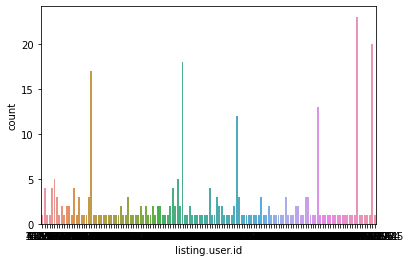

In [46]:
# Plot number of listings per host
sns.countplot(x='listing.user.id',data=df)